In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Task 1
For every column in the data:

a. State whether the values match the description given in the table above. <br/>
b. State the number of missing values in the column <br/>
c. Describe what you did to make values match the description if they did not
match.


In [2]:
coffee_data = pd.read_csv('coffee.csv')
ratings_unfilled = coffee_data["Rating"]

### Number of missing values in each column

In [3]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


### Replacing NaNs with corresponding values

In [4]:
coffee_data.fillna({"Region": "Unknown",
                    "Place name": "Unknown",
                    "Place type": "Unknown",
                    "Rating": 0,
                    "Reviews": coffee_data["Reviews"].dropna().median(),
                    "Price": "Unknown",
                    "Delivery Option": False,
                    "Dine in option": False,
                    "Takeout option": False},
                    inplace=True)

In [5]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


### Checking if values match given description

In [6]:
categories = ["Region", "Place type", "Price", "Delivery option", "Dine in option", "Takeout option"]
for cat in categories:
    print(cat + ": \n " + str(coffee_data[cat].unique()) + "\n")
print("Rating: \n All ratings in range (0,5) ", coffee_data["Rating"].between(0,5, inclusive="both").all())

Region: 
 ['C' 'J' 'F' 'B' 'A' 'E' 'D' 'G' 'I' 'H']

Place type: 
 ['Others' 'Cafe' 'Coffee shop' 'Espresso bar']

Price: 
 ['$$' '$' '$$$']

Delivery option: 
 [False  True]

Dine in option: 
 [False  True]

Takeout option: 
 [False  True]

Rating: 
 All ratings in range (0,5)  True


# Task 2
Create a visualization that shows how many stores were given each rating. Use the
visualization to:

**a. State which category of the variable rating has the most number of observations** <br/>
    Most number of observation has category 4.6

**b. Explain whether the observations are balanced across categories**<br/>
    Biggest part of ratings has value higher than 4.5

<Axes: title={'center': 'Graph 2.1: Count of rating'}, xlabel='Rating', ylabel='Count'>

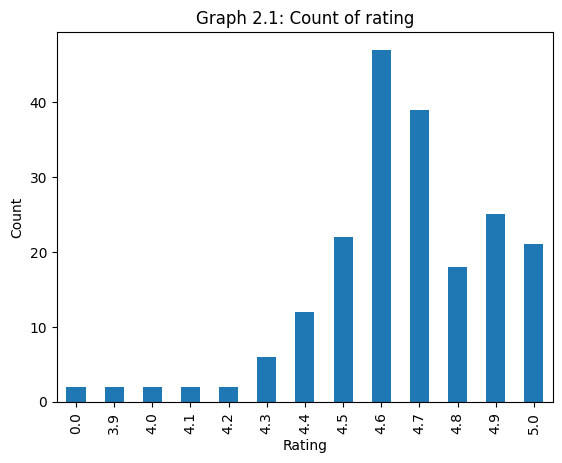

In [7]:
coffee_data["Rating"].value_counts().sort_index().plot(kind="bar", xlabel="Rating", ylabel="Count", title="Graph 2.1: Count of rating")

# Task 3
**Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution**<br/>
Because distribution is heavily skewd, it is better to show it with logarythmic scale. Also it can be noticed, that there is outlier over 17500.

<Axes: xlabel='Reviews', ylabel='Count'>

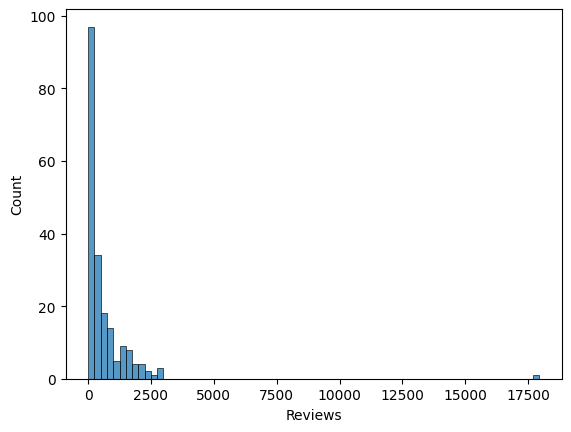

In [8]:
sns.histplot(data=coffee_data, x="Reviews")

<Axes: xlabel='Reviews', ylabel='Count'>

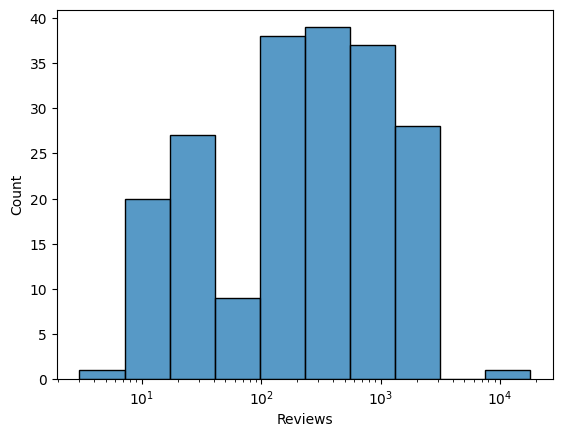

In [9]:
sns.histplot(data=coffee_data, x="Reviews", log_scale=True)

# Task 4
**Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.**<br/>
After removing outlier that was making it harder to interpret the relationship between number of reviews and rating, it can be said, that stores with highest number of reviews, are having mean rating score around 4.6

<Axes: xlabel='Rating', ylabel='Reviews'>

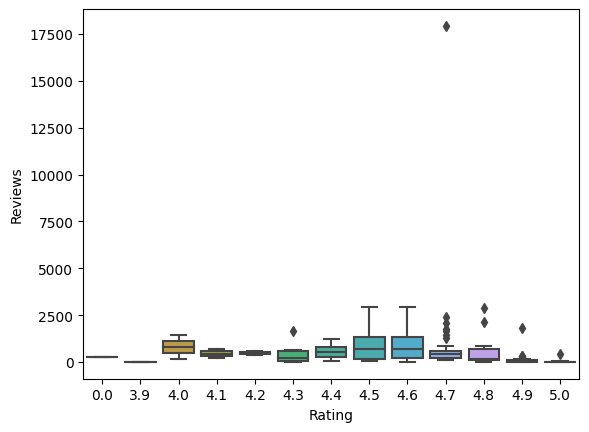

In [10]:
sns.boxplot(data=coffee_data, x="Rating", y="Reviews")

<Axes: xlabel='Rating', ylabel='Reviews'>

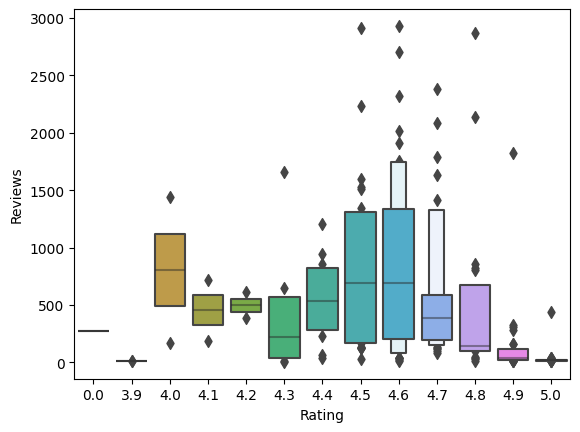

In [11]:
trimmed_outliers = coffee_data[coffee_data["Reviews"] < 5000]
sns.boxenplot(data=trimmed_outliers, x="Rating", y="Reviews")

# Task 5
**The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).**<br/>
It is regression.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
trimmed_coffee = coffee_data[coffee_data["Reviews"] < coffee_data["Reviews"].max()]
y_coffee = np.array(np.log(trimmed_coffee["Reviews"])).reshape(-1,1)
x_coffee = trimmed_coffee.drop(["Place name","Reviews"], axis="columns")
display(x_coffee[:3])

,Region,Place type,Rating,Price,Delivery option,Dine in option,Takeout option
0,C,Others,4.6,$$,False,False,False
1,C,Cafe,5.0,$$,False,False,True
2,C,Coffee shop,5.0,$$,False,False,True


In [14]:
coltr = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["Region", "Place type", "Price", "Delivery option", "Dine in option",	"Takeout option"])], remainder="passthrough")
x_coffee = coltr.fit_transform(x_coffee)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(x_coffee, y_coffee, test_size=0.2, random_state=123)

In [16]:
scaler_x = StandardScaler(with_mean=False)
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [17]:
scaler_y = StandardScaler(with_mean=False)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [18]:
print(X_train.shape)

(159, 24)


# Task 6
Fit a baseline model to predict the number of reviews a store will get using the data
provided. You must include your code.
## Linear regression model

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

# Task 7
Fit a comparison model to predict the number of reviews a store will get using the
data provided. You must include your code
## Random Forest regression model

In [25]:
forreg = RandomForestRegressor()
forreg.fit(X_train, y_train)
y_pred_for = forreg.predict(X_test)

# Task 8
I've chose linear model, as it is accurate as baseline model for regression problem.<br/>
For a comparission model i've chose random forest model, because it is model from a different category of regression models than linear, and it performs better than simple decision tree.

# Task 9
I've used rooted mean square error as it can be simply interpreted as distance between values predicted and true values.

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred_lin))

0.9786583638533526

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred_for))

1.1996648240837664

# Task 10
Linear model preforms better, because it's mean distance to true values is smaller than in random forest model.